# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

The data set that I will be using is the Adult Census information from 1994! I will be predicting an adult's income, specifically whether an individual's income exceeds a certain threshold ($50,000/year). The label will be 'income_binary'. This is a supervised learning problem because we have labeled data to train the model. Specifically, it is a binary classification problem, as the label has two possible categories: <=50K and >50K. Features may include 'age', 'workclass', 'education', 'education-num', 'occupation', 'sex_selfID', and 'hours-per-week'. This may be helpful for a business especially in target marketing and product development - understanding income levels can help businesses tailor their services and marketing strategies to different income groups to improve customer engagement and satisfaction.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("\n")

print("Column names:", df.columns.tolist())
print("\n")

print("First ten rows: ")
print(df.head(10))

Number of rows: 32561
Number of columns: 15


Column names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income_binary']


First ten rows: 
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   
5  37.0           Private  284582    Masters             14   
6  49.0           Private  160187        9th              5   
7  52.0  Self-emp-not-inc  209642    HS-grad              9   
8  31.0           Private   45781    Masters             14   
9  42.0           Private  159449  Bachelors             13   

          m

In [4]:
# create binary variables for workclass
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [5]:
# Only 2 values for self-employment, simplify our code by writing NOT self employed 
# Ref. CreatingBinaryVariables

# get all examples (rows) in which the workclass feature (column) is not self-employed
# Note: the code below uses the Pandas logical operator ~ for NOT
columns_not_self_employed = ~(df['workclass'] == 'Self-emp-not-inc') & ~(df['workclass'] == 'Self-emp-inc')

#leave nan (null) in the dataset for now. Get all examples (rows) in which the workclass feature (column) is not null
columns_not_null = ~(df['workclass'].isnull())  

# create condition
condition = columns_not_self_employed & columns_not_null

# Use np.where() to change all of the workclass values that fulfill the specified condition to Not-self-emp
df['workclass'] = np.where(condition, 'Not-self-emp', df['workclass'])

# Inspect the data to see the changed values
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,Not-self-emp,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Not-self-emp,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Not-self-emp,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Not-self-emp,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Not-self-emp,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Not-self-emp,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Not-self-emp,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Not-self-emp,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


In [6]:
# changing workclass options
condition = (df['workclass'] == 'Self-emp-not-inc') | (df['workclass'] == 'Self-emp-inc')
df['workclass'] = np.where(condition, 'Self-emp', df['workclass'])
#df['workclass'].unique()

In [7]:
# Transforms the labels into a binary True/False variable
# True: label for an income level >50K
# ref. to CreatingBinaryVariables

condition1 = (df['income_binary'] == '>50K')
df['income_binary'] = np.where(condition1, 'True', df['income_binary'])

condition2 = (df['income_binary'] == '<=50K')
df['income_binary'] = np.where(condition2, 'False', df['income_binary'])


df['native-country-US'] = np.where(df['native-country'] == 'United-States', 'True', 'False')
df.drop(columns='native-country', inplace=True)

df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,income_binary,native-country-US
0,39.0,Not-self-emp,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,False,True
1,50.0,Self-emp,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,False,True
2,38.0,Not-self-emp,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,False,True
3,53.0,Not-self-emp,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,False,True
4,28.0,Not-self-emp,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,False,False
5,37.0,Not-self-emp,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,False,True
6,49.0,Not-self-emp,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,False,False
7,52.0,Self-emp,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,True,True
8,31.0,Not-self-emp,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,True,True
9,42.0,Not-self-emp,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,True,True


In [8]:
# df['education-num-win'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])
# df.head(15)

**Identifying Missing Data:**

In [9]:
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

print("\n")

condition = nan_count != 0 # look for all columns with missing values
col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print("Columns with missing values:")
print(nan_cols)

age                   162
workclass            1836
fnlwgt                  0
education               0
education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
sex_selfID              0
capital-gain            0
capital-loss            0
hours-per-week        325
income_binary           0
native-country-US       0
dtype: int64


Index(['age', 'workclass', 'occupation', 'hours-per-week'], dtype='object')
Columns with missing values:
['age', 'workclass', 'occupation', 'hours-per-week']


**Dealing with Missing Data:**

In [10]:
# df['age_na'] = df['age'].isnull()
# df['hours-per-week_na'] = df['hours-per-week'].isnull()
# #df.head()

# df.loc[df['age'].isnull()]

# mean_ages=df['age'].mean()
# df['age'].fillna(value=mean_ages, inplace=True)

# mean_hours=df['hours-per-week'].mean()
# df['hours-per-week'].fillna(value = mean_hours, inplace = True)

mean_ages=df['age'].mean()
df['age'].fillna(value=mean_ages, inplace=True)
mean_hours=df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours, inplace=True)

# print(np.sum(df['age'].isnull(), axis = 0))
# print(np.sum(df['hours-per-week'].isnull(), axis = 0))

In [11]:
# print("Before: ") 
# print(df.isnull().values.any())

# df.dropna(inplace=True)

# print("After: ") 
# print(df.isnull().values.any())

**Focusing Our Data (Features):**

In [12]:
features = [col for col in df.columns if col != 'income_binary']

In [13]:
to_encode = [col for col in features if df[col].dtype == 'object']
# to_encode

to_encode_uniques = {}

for col in to_encode:
    unique_count = df[col].nunique()
    to_encode_uniques[col] = unique_count

print(to_encode_uniques)

{'workclass': 2, 'education': 16, 'marital-status': 7, 'occupation': 14, 'relationship': 6, 'race': 5, 'sex_selfID': 2, 'native-country-US': 2}


In [14]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
# applying the encoder
df_enc = pd.DataFrame(enc.fit_transform(df[to_encode]))

In [15]:
df_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
# Use the method enc.get_feature_names() to resintate the original column names. 
# Call the function with the original two column names as arguments.
# Save the results to 'df_enc.columns'

#df_enc.columns = enc.get_feature_names()
df_enc.columns = enc.get_feature_names_out(['workclass', 'education', 'marital-status', 'occupation',
                                            'relationship', 'race', 'sex_selfID', 'native-country-US'])



In [17]:
df_enc.head(10)

,workclass_Not-self-emp,workclass_Self-emp,workclass_nan,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,...,relationship_Wife,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female,native-country-US_False,native-country-US_True
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [18]:
df.drop(columns=to_encode, inplace=True)

In [19]:
df = pd.concat([df, df_enc], axis=1)

In [20]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'workclass_Not-self-emp',
       'workclass_Self-emp', 'workclass_nan', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handler

## Part 4: Define Your Project Plan
Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Regarding data preparation, I was able to complete in this in part 3 (above). To begin, I made my label into a binary variable - instead of making the feature's value <=50k or >50k, I made it True or False on whether or not the income_binary was <=50k. Also, I addressed missingness by replacing missing values for two features with the calculated means. Additionally, I performed feature engineering by implementing one-hot encoding on categorical features. This addressed missingness for columns with object values and also helped in renaming features and labels for clearer data analysis. I realized that for the one-hot encoding, doing it to the native-country would create too many unnecessary rows so I also changed it into a binary value of whether the person was in the US or not, as majority of the data points were of adults in the US. Following this process, yes, I have a new feature list. I decided to keep all of the features - however, this is something I will reconsider when trying to improve my model's performance. I decided on using the *Decision Tree* model as it is great when it comes to handling nonlinearity, interpretability, and identifying feature importance. I will be training each model on the training set (X_train, y_train) and make sure to validate and tune hyperparameters to improve the model. Hopefully this process will produce a model that generalizes well to new data. 


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

**Note:** I prepared my data in part 3 and expanded on it in part 4. I saw on Piazza that we should make a note of this!

In [24]:
X = df.drop('income_binary', axis=1)  # Features
y = df['income_binary']  # Target

In [25]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 32561

Number of Features:62
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_Not-self-emp', 'workclass_Self-emp', 'workclass_nan', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service',

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [36]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    class_label_predications = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predications)
          
    
    return acc_score

In [37]:
depth1 = 8
depth2 = 32

max_depth_range = [depth1, depth2]
acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=8, accuracy score: 0.8191885352689373
Max Depth=32, accuracy score: 0.8182579564489112


In [38]:
def visualize_accuracy(hyperparameters, accuracy_scores):
    if len(hyperparameters) != len(accuracy_scores):
        raise ValueError("The input lists must be of the same size.")

    sns.lineplot(x = hyperparameters, y = accuracy_scores)
    plt.xlabel('Hyperparameter Values')
    plt.ylabel('Accuracy Scores')
    plt.title('Accuracy Scores vs. Hyperparameter Values')
    plt.show()

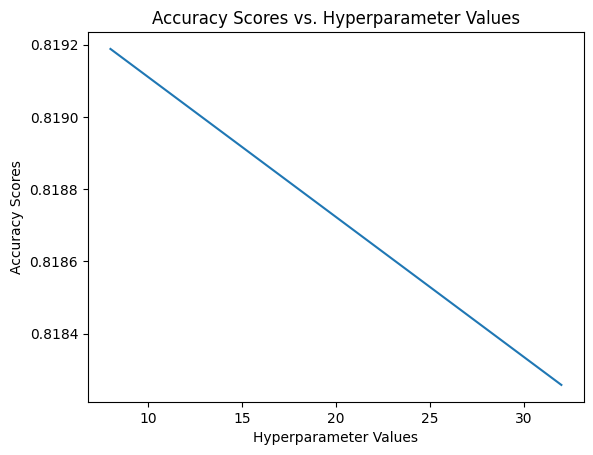

In [39]:
visualize_accuracy(max_depth_range, acc)

Max Depth=1, accuracy score: 0.817606551274893
Max Depth=2, accuracy score: 0.8203982877349711
Max Depth=4, accuracy score: 0.8169551461008747
Max Depth=8, accuracy score: 0.8176996091568955
Max Depth=16, accuracy score: 0.8182579564489112
Max Depth=32, accuracy score: 0.8174204355108877


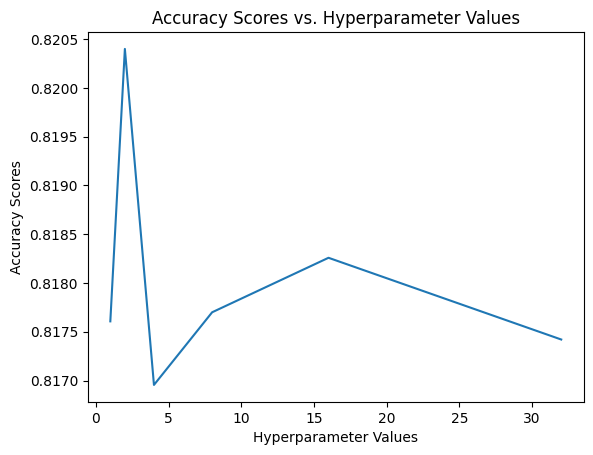

In [40]:
depth1 = 1
depth2 = 32

max_depth_range = [depth1, 2, 4, 8, 16, depth2]
acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

visualize_accuracy(max_depth_range, acc)